In [3]:
! # pip install eli5
import pandas as pd
import numpy as np

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_histogram
from plotnine import geom_boxplot, scale_y_log10, geom_bar, geom_line, ggtitle
from plotnine import facet_wrap, scale_x_log10
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import itertools
import scipy.stats as scs
import matplotlib.pyplot as plt
import pickle


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LeakyReLU, BatchNormalization, ReLU
from keras import callbacks, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor

#from eli5.sklearn import PermutationImportance
#import eli5

AttributeError: 'property' object has no attribute '__name__'

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 4.1 MB 337 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 1.6 MB/s eta 0:00:01    |█████████████████▋              | 5.6 MB 2.3 MB/s eta 0:00:02
     |████████████████████████████████| 111 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 4.1 MB/s eta 0:00:011
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


In [246]:
'''

land = pd.read_csv('/content/drive/My Drive/omdena-model-b-c-nn/dataset/LAND_COVER_03052020050019102.csv')
land = land[['COU', 'VARIABLE', 'YEA', 'Value']]
land = land[land['YEA'] == 2015]

land_pivot = land.pivot(columns='VARIABLE', values='Value')
land_pivot = land_pivot.fillna(0.0)

land_final = pd.concat([land, land_pivot], axis=1)

ld_cols = ['COU', 'CROPL',	'FOREST',	'GRSL',	'SHRUBL',	
           'SPARSE_VEGETATION', 'URBAN',	'WATER', 'WETL']

land_final = land_final[ld_cols]


land_final_g = land_final.groupby(['COU']).sum()


df = pd.merge(df, land_final_g, how='left', left_on=['ISO'], right_on=['COU'])
'''

"\n\nland = pd.read_csv('/content/drive/My Drive/omdena-model-b-c-nn/dataset/LAND_COVER_03052020050019102.csv')\nland = land[['COU', 'VARIABLE', 'YEA', 'Value']]\nland = land[land['YEA'] == 2015]\n\nland_pivot = land.pivot(columns='VARIABLE', values='Value')\nland_pivot = land_pivot.fillna(0.0)\n\nland_final = pd.concat([land, land_pivot], axis=1)\n\nld_cols = ['COU', 'CROPL',\t'FOREST',\t'GRSL',\t'SHRUBL',\t\n           'SPARSE_VEGETATION', 'URBAN',\t'WATER', 'WETL']\n\nland_final = land_final[ld_cols]\n\n\nland_final_g = land_final.groupby(['COU']).sum()\n\n\ndf = pd.merge(df, land_final_g, how='left', left_on=['ISO'], right_on=['COU'])\n"

## Load important libraries

In [0]:
# Import File
filepath = '/content/drive/My Drive/omdena-model-b-c-nn/dataset/OUTPUT_WBI_exposer_cyclones_v14.csv'
df = pd.read_csv(filepath, sep=';')

In [248]:
df.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,MONTH_END,DATE_START,DATE_END,DATE_LAND_START,DATE_LAND_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,NATURE,GENERAL_CATEGORY,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,MAX_USA_SSHS_INLAND,V_LAND_KN,DISTANCE_TRACK,DISTANCE_TRACK_VINCENTY,34KN_POP,64KN_POP,96KN_POP,64KN_ASSETS,34KN_ASSETS,96KN_ASSETS,TOTAL_DAMAGE_(000$),TOTAL_DEATHS,POP_DEN_SQ_KM,RURAL_POP(%),HDI,Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,6,19/06/1949 9:00,24/06/1949 6:00,20/06/1949 15:00,23/06/1949 3:00,117.0,60.0,TS,Cat 4,116.0,952,0,33.0,3,0,99.82,3889.480640,3632.626180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419.0,195.0,77.20,0.816,0.059615,4173.5,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,9,30/08/1950 3:00,05/09/1950 0:00,03/09/1950 3:00,04/09/1950 0:00,141.0,21.0,ET,Cat 4,116.0,940,0,31.0,3,1,99.82,3596.090691,2787.480021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509.0,227.0,47.00,0.816,0.059615,4173.5,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,8,17/08/1951 21:00,18/08/1951 12:00,18/08/1951 3:00,18/08/1951 6:00,15.0,3.0,TS,Cat 3,110.0,0,0,17.0,3,3,132.40,438.214691,435.729082,2788659.0,2788659.0,2552903.0,2.148198e+10,2.148198e+10,1.948346e+10,56000.0,154.0,133.0,66.23,0.668,0.100541,868.3,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,12,07/12/1951 9:00,17/12/1951 0:00,09/12/1951 12:00,11/12/1951 0:00,231.0,36.0,TS,Cat 4,120.0,924,0,11.0,4,2,119.20,2238.058669,1905.587795,20464826.0,12675908.0,5618193.0,1.131050e+11,1.880280e+11,4.897333e+10,NaN,569.0,64.5,75.35,0.590,0.180442,996.3,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,60000
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,7,01/07/1952 6:00,04/07/1952 18:00,02/07/1952 12:00,02/07/1952 21:00,84.0,9.0,TS,Cat 3,110.0,968,0,15.0,3,1,110691.00,1876.186790,1797.712213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,66.9,72.41,0.590,0.180442,996.3,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,103


# Drop Columns & Some Pre - preprocessing


In [0]:
# Drop some unimportant features
drop_cols = ['34KN_POP', '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', 
             '96KN_POP', '96KN_ASSETS', "SID", 'NAME', 'ISO', 
             'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 'DATE_LAND_END',
             'DATE_START',	'DATE_END',	'DATE_LAND_START', 'MONTH_END',
             'COORDS',	'COORDS_MAX_WINDS',	'COORDS_MIN_DIST2LAND', 
             'TOTAL_HOURS_EVENT']

df = df.drop(columns=drop_cols)

In [0]:
### Xaview Preprocessing
df["SUB BASIN"]= df["SUB BASIN"].replace('MM', np.nan) 
df["BASIN"]= df["BASIN"].replace('MM', np.nan)

df['SUB BASIN']= np.where(df['SUB BASIN'].isnull(), df['BASIN'], df['SUB BASIN'])

In [251]:
df["BASIN"].unique()

array(['WP', 'NAm', 'SP', 'EP', 'SI', 'NI'], dtype=object)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   YEAR                                                991 non-null    int64  
 1   BASIN                                               991 non-null    object 
 2   SUB BASIN                                           991 non-null    object 
 3   MONTH_START                                         991 non-null    int64  
 4   TOTAL_HOURS_IN_LAND                                 991 non-null    float64
 5   NATURE                                              991 non-null    object 
 6   GENERAL_CATEGORY                                    991 non-null    object 
 7   MAX_WIND                                            991 non-null    float64
 8   MIN_PRES                                            991 non-null    int64  
 9  

In [253]:
## Check features null count
def checkNull(col, df):
  return(df[col].isna().sum() / len(df[col]) * 100.0)
  
for each in df.columns.values:
  print('{} ---- {}'.format(each, checkNull(each, df)))

YEAR ---- 0.0
BASIN ---- 0.0
SUB BASIN ---- 0.0
MONTH_START ---- 0.0
TOTAL_HOURS_IN_LAND ---- 0.0
NATURE ---- 0.0
GENERAL_CATEGORY ---- 0.0
MAX_WIND ---- 0.0
MIN_PRES ---- 0.0
MIN_DIST2LAND ---- 0.0
MAX_STORMSPEED ---- 0.20181634712411706
MAX_USA_SSHS ---- 0.0
MAX_USA_SSHS_INLAND ---- 0.0
V_LAND_KN ---- 0.0
DISTANCE_TRACK ---- 0.0
DISTANCE_TRACK_VINCENTY ---- 0.0
POP_DEN_SQ_KM ---- 0.0
RURAL_POP(%) ---- 0.0
HDI ---- 0.0
Arable land (hectares per person) ---- 0.10090817356205853
Cereal yield (kg per hectare) ---- 1.0090817356205852
Food production index (2004-2006 = 100) ---- 0.4036326942482341
GDP per capita (constant 2010 US$) ---- 0.9081735620585267
Net flows from UN agencies US$ ---- 0.0
Life expectancy at birth, total (years) ---- 0.4036326942482341
Adjusted savings: education expenditure (% of GNI) ---- 1.0090817356205852
Income_level_Final ---- 0.0
POP_MAX_34_ADJ ---- 8.072653884964682
POP_MAX_50_ADJ ---- 8.072653884964682
POP_MAX_64_ADJ ---- 8.072653884964682
TOTAL_AFFECTED ----

In [254]:
## USA_SSHS Preprocessing

df['MAX_USA_SSHS_INLAND'][df['MAX_USA_SSHS_INLAND'] == 'No landing'] = -7
df['MAX_USA_SSHS_INLAND'] = df['MAX_USA_SSHS_INLAND'].astype('int')

## Engineer new features
# If value is 7
# And if value falls in the SS scale

df['MAX_SSH_7'] = np.where(df['MAX_USA_SSHS_INLAND'] == -7, 1, 0)
df['MAX_SSH_SS'] = np.where(df['MAX_USA_SSHS_INLAND'] > 0, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Numerical Features With NaNs

## Helper Functions

In [0]:
objects_viz = ['BASIN', 'SUB BASIN', 'NATURE', 'GENERAL_CATEGORY', 
               'Income_level_Final']


## Bi & MultiVariate Plots
def plotBiMulti(x, y='TOTAL_AFFECTED', scale_x=False, scale_y=False):
  return
  x_corr = (np.log10(df[x] + 1) if scale_x else df[x])
  y_corr = (np.log10(df[y] + 1) if scale_y else df[y])

  print("Correlation - ", pearsonr(x_corr, y_corr)[0])

  null = geom_point()
  for each in objects_viz:
    print(ggplot(df, aes(x=x, y=y, fill=each))
 + geom_point(color='steelblue')
 + (scale_x_log10() if scale_x else null)
 + (scale_y_log10() if scale_y else null))
    

## Categorical
def plotBiMulti_cat(x, y='TOTAL_AFFECTED', fill="#990099"):
  return

  objects_viz_temp = [cat for cat in objects_viz if cat != x]

  for each in objects_viz_temp:
    print(ggplot(df, aes(x=x, y=y, fill=each)) + geom_bar(stat="identity", 
                                                          position="dodge"))

    

## Checks for outliers. 
def outlier_check(x):
  upper_quartile = np.nanpercentile(x, 75)
  lower_quartile = np.nanpercentile(x, 25)
  IQR = 1.5 * (upper_quartile - lower_quartile)
  q_both = [lower_quartile - IQR, upper_quartile + IQR]

  outliers = np.where(x < q_both[0])[0], np.where(x > q_both[1])[0]

  return({"lower": outliers[0], 
          "upper": outliers[1], 
          "q_both": q_both, 
          'min-max': [x.min(), x.max()]})


### Helper Func - Clip outliers
def clip_outliers(x, outlier_dict):
  lower_idx = outlier_dict["lower"]
  upper_idx = outlier_dict["upper"]
  q_both = outlier_dict["q_both"]

  x[lower_idx] = q_both[0]
  x[upper_idx] = q_both[1]


## MAX_STORMSPEED

In [0]:
#############################################################################
#############################################################################
################ Numerical Features With NaNs ###############################
#############################################################################
#############################################################################
### MAX_STORMSPEED

plotBiMulti('MAX_STORMSPEED', scale_x=0, scale_y=True)

## Arable land (hectares per person)

In [0]:
## Arable land (hectares per person) ---- 0.09950248756218905



In [258]:
plotBiMulti('Arable land (hectares per person)', scale_x=True, scale_y=True)
print(outlier_check(df['Arable land (hectares per person)']))

{'lower': array([], dtype=int64), 'upper': array([  6,  28,  35,  42,  61,  92,  97, 139, 166, 172, 211, 220, 247,
       257, 260, 290, 307, 309, 312, 321, 328, 334, 357, 358, 360, 365,
       377, 379, 383, 388, 393, 406, 412, 417, 419, 453, 458, 470, 480,
       481, 483, 496, 507, 519, 539, 545, 555, 563, 565, 566, 579, 642,
       648, 654, 658, 660, 674, 689, 720, 737, 739, 755, 767, 777, 783,
       830, 850, 851, 878, 894, 904, 916, 927, 932, 941, 972, 977]), 'q_both': [-0.13987619737500004, 0.39300619562500005], 'min-max': [0.004410046, 3.069372586]}


## Food production index (2004-2006 = 100)

In [0]:
## Food production index (2004-2006 = 100)




In [260]:
plotBiMulti('Food production index (2004-2006 = 100)', 
            scale_x=True, scale_y=True)
print(outlier_check(df['Food production index (2004-2006 = 100)']))

{'lower': array([ 7,  9, 12, 16, 17, 20, 23, 26, 36, 39]), 'upper': array([965]), 'q_both': [19.474999999999987, 170.63500000000002], 'min-max': [13.36, 202.3770886]}


## GDP per capita (constant 2010 US$)

In [0]:
## GDP per capita (constant 2010 US$)




In [262]:
plotBiMulti('GDP per capita (constant 2010 US$)', 
            scale_x=True, scale_y=True)
print(outlier_check(df['GDP per capita (constant 2010 US$)']))

{'lower': array([], dtype=int64), 'upper': array([ 24,  29,  35,  61,  77,  81,  86,  87,  92,  96, 116, 121, 122,
       132, 134, 135, 139, 146, 163, 164, 166, 170, 172, 177, 191, 211,
       219, 220, 233, 247, 248, 256, 257, 260, 277, 290, 304, 307, 309,
       312, 317, 318, 321, 328, 333, 334, 337, 349, 357, 358, 360, 361,
       365, 366, 368, 377, 379, 383, 384, 388, 393, 394, 404, 412, 417,
       419, 427, 429, 438, 446, 447, 453, 456, 458, 470, 475, 478, 480,
       481, 483, 492, 496, 499, 501, 502, 505, 506, 507, 508, 515, 518,
       519, 520, 521, 522, 538, 539, 542, 545, 555, 556, 563, 565, 566,
       579, 581, 596, 604, 609, 614, 642, 648, 654, 656, 658, 660, 661,
       662, 674, 688, 689, 695, 709, 720, 726, 734, 736, 737, 738, 739,
       740, 755, 767, 768, 769, 770, 777, 783, 800, 802, 807, 812, 824,
       829, 830, 839, 840, 850, 851, 855, 861, 865, 867, 878, 892, 893,
       894, 898, 901, 904, 916, 925, 927, 928, 932, 935, 939, 941, 945,
       971, 972, 974,

## Life expectancy at birth, total (years)

In [0]:
### Life expectancy at birth, total (years)





In [264]:
plotBiMulti('Life expectancy at birth, total (years)', 
            scale_x=False, scale_y=True)
print(outlier_check(df['Life expectancy at birth, total (years)']))

{'lower': array([  5,   7,   9,  12,  15,  16,  17,  20,  23,  26,  31,  33,  38,
        41,  42,  43,  44,  53,  76,  84, 101, 102, 107, 114, 128, 140,
       150, 154, 173, 197, 202, 228, 237, 326, 392, 464, 465, 593, 630,
       675]), 'upper': array([], dtype=int64), 'q_both': [53.64792682499997, 87.95124390500003], 'min-max': [41.762, 84.0997561]}


## POP_MAX_34_ADJ

In [0]:
## POP_MAX_34_ADJ



In [266]:
plotBiMulti('POP_MAX_34_ADJ', 
            scale_x=True, scale_y=True)
print(outlier_check(df['POP_MAX_34_ADJ']))

{'lower': array([], dtype=int64), 'upper': array([ 34,  36,  58, 176, 200, 221, 259, 278, 288, 293, 300, 315, 331,
       347, 380, 381, 385, 397, 402, 403, 419, 427, 429, 447, 450, 472,
       475, 477, 495, 504, 519, 522, 536, 537, 543, 570, 574, 575, 577,
       596, 598, 603, 604, 619, 631, 638, 643, 658, 665, 681, 687, 695,
       711, 713, 729, 737, 740, 756, 759, 760, 770, 777, 793, 798, 802,
       805, 809, 823, 824, 839, 840, 841, 860, 862, 864, 881, 897, 900,
       908, 920, 929, 932, 935, 945, 961, 966, 970, 971, 972, 974]), 'q_both': [-41609129.53625001, 77542042.32975], 'min-max': [0.0, 376497216.0]}


## POP_MAX_50_ADJ

In [0]:
### POP_MAX_50_ADJ










In [268]:
plotBiMulti('POP_MAX_50_ADJ', 
            scale_x=True, scale_y=True)
print(outlier_check(df['POP_MAX_50_ADJ']))

{'lower': array([], dtype=int64), 'upper': array([ 39, 122, 132, 135, 145, 163, 176, 177, 200, 233, 242, 248, 288,
       293, 300, 315, 317, 323, 331, 347, 361, 367, 370, 380, 381, 385,
       394, 397, 413, 421, 447, 449, 472, 475, 477, 495, 504, 521, 522,
       527, 537, 538, 541, 543, 569, 570, 577, 596, 598, 604, 619, 638,
       639, 643, 658, 660, 665, 681, 687, 695, 713, 737, 740, 756, 760,
       770, 777, 793, 797, 798, 802, 805, 812, 823, 838, 839, 840, 841,
       855, 860, 862, 864, 869, 892, 897, 898, 900, 908, 935, 945]), 'q_both': [-22726869.377499994, 40697566.59449999], 'min-max': [0.0, 322276189.0]}


## POP_MAX_64_ADJ

In [0]:
### ### POP_MAX_64_ADJ



    
                                            




In [270]:
plotBiMulti('POP_MAX_64_ADJ', 
            scale_x=0, scale_y=1)
print(outlier_check(df['POP_MAX_64_ADJ']))

{'lower': array([], dtype=int64), 'upper': array([ 39,  50, 108, 122, 163, 200, 221, 242, 259, 288, 289, 293, 300,
       313, 315, 331, 347, 361, 380, 381, 385, 397, 413, 415, 421, 427,
       429, 475, 477, 501, 504, 507, 519, 521, 522, 536, 537, 538, 543,
       550, 569, 570, 574, 575, 577, 583, 598, 604, 619, 631, 638, 639,
       643, 658, 660, 665, 667, 670, 681, 687, 695, 696, 703, 706, 711,
       713, 729, 737, 740, 756, 758, 760, 770, 777, 778, 790, 793, 797,
       798, 805, 823, 825, 829, 838, 839, 840, 841, 855, 860, 864, 869,
       871, 882, 891, 892, 897, 898, 899, 900, 908, 925, 935, 937, 945,
       964, 966, 971, 973, 974]), 'q_both': [-7936958.950250001, 13966258.90135], 'min-max': [0.0, 107368555.8]}


## Adjusted savings: education expenditure (% of GNI)

In [0]:
## Adjusted savings: education expenditure (% of GNI)



In [272]:
plotBiMulti('Adjusted savings: education expenditure (% of GNI)', 
            scale_x=True, scale_y=True)
print(outlier_check(df['Adjusted savings: education expenditure (% of GNI)']))

{'lower': array([], dtype=int64), 'upper': array([120, 219, 318, 337, 451, 457, 497, 509, 515, 533, 554, 615, 647,
       653, 659, 672, 734, 766, 776, 858, 903, 931, 939, 959, 976]), 'q_both': [-1.8457142855, 7.9828571425], 'min-max': [0.538880795, 14.01]}


## Cereal yield (kg per hectare)

In [0]:
### Cereal yield (kg per hectare)
                                            






In [274]:

plotBiMulti('Cereal yield (kg per hectare)', 
            scale_x=0, scale_y=True)
print(outlier_check(df['Cereal yield (kg per hectare)']))

{'lower': array([], dtype=int64), 'upper': array([], dtype=int64), 'q_both': [-2268.0999999999995, 9272.699999999999], 'min-max': [393.3, 8900.0]}


In [275]:

'''
df['CROPL'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['CROPL']).reshape(-1, 1))

##                                
                                            
df['FOREST'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['FOREST']).reshape(-1, 1))
                                            
 ##                                
                                            
df['GRSL'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['GRSL']).reshape(-1, 1))
                                            
 ##                                
                                            
df['SHRUBL'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['SHRUBL']).reshape(-1, 1))
                                            
 ##                                
                                            
df['SPARSE_VEGETATION'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['SPARSE_VEGETATION']).reshape(-1, 1))
                                            
 ##                                
                                            
df['WATER'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['WATER']).reshape(-1, 1))
                                            
 ##                                
                                            
df['CROPL'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['CROPL']).reshape(-1, 1))
                                            
 ##                                
                                            
df['WETL'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['WETL']).reshape(-1, 1))
                                             
##                                
                                            
df['URBAN'] = SimpleImputer(missing_values=np.nan, 
                                            strategy='median').fit_transform(
    np.array(df['URBAN']).reshape(-1, 1))
                                            
'''



"\ndf['CROPL'] = SimpleImputer(missing_values=np.nan, \n                                            strategy='median').fit_transform(\n    np.array(df['CROPL']).reshape(-1, 1))\n\n##                                \n                                            \ndf['FOREST'] = SimpleImputer(missing_values=np.nan, \n                                            strategy='median').fit_transform(\n    np.array(df['FOREST']).reshape(-1, 1))\n                                            \n ##                                \n                                            \ndf['GRSL'] = SimpleImputer(missing_values=np.nan, \n                                            strategy='median').fit_transform(\n    np.array(df['GRSL']).reshape(-1, 1))\n                                            \n ##                                \n                                            \ndf['SHRUBL'] = SimpleImputer(missing_values=np.nan, \n                                            strategy='median').fit_transform

# Numerical Features Without NaNs

In [0]:
#############################################################################
#############################################################################
################ Numerical Features Without NaNs ############################
#############################################################################
#############################################################################

## TOTAL_HOURS_EVENT

In [0]:
## TOTAL_HOURS_EVENT
## Further investigate - may be outliers




## TOTAL_HOURS_IN_LAND

In [0]:
## TOTAL_HOURS_IN_LAND




In [279]:
plotBiMulti('TOTAL_HOURS_IN_LAND', 
            scale_x=0, scale_y=1)
print(outlier_check(df['TOTAL_HOURS_IN_LAND']))

{'lower': array([], dtype=int64), 'upper': array([  6,  36,  38,  45,  58,  79, 128, 133, 152, 154, 172, 204, 257,
       259, 268, 290, 293, 300, 307, 312, 331, 347, 351, 365, 379, 380,
       390, 411, 417, 419, 482, 487, 495, 504, 507, 519, 537, 539, 551,
       566, 570, 574, 579, 598, 621, 641, 642, 643, 648, 654, 672, 674,
       675, 690, 694, 704, 714, 720, 721, 752, 760, 767, 783, 797, 803,
       850, 878, 894, 927, 932, 953, 958, 960, 966, 967, 968, 970, 972]), 'q_both': [-36.0, 60.0], 'min-max': [0.0, 333.0]}


## MONTH_START

In [0]:
### MONTH_START


In [281]:
plotBiMulti('MONTH_START', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MONTH_START']))

{'lower': array([ 38,  41,  44,  52,  53,  61,  73,  74,  75,  84, 103, 119, 120,
       140, 141, 150, 151, 152, 153, 160, 161, 172, 186, 196, 197, 198,
       209, 210, 237, 252, 286, 309, 326, 327, 343, 377, 388, 389, 390,
       442, 443, 444, 461, 462, 463, 465, 487, 488, 528, 563, 564, 593,
       626, 627, 628, 674, 719, 720, 721, 748, 749, 750, 751, 752, 783,
       784, 785, 786, 818, 819, 820, 847, 848, 849, 850, 851, 879, 914,
       951, 952, 953, 985]), 'upper': array([], dtype=int64), 'q_both': [2.5, 14.5], 'min-max': [1, 12]}


## MONTH_END

In [0]:
### MONTH_END


In [283]:
'''plotBiMulti('MONTH_END', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MONTH_END']))'''

"plotBiMulti('MONTH_END', \n            scale_x=0, scale_y=1)\nprint(outlier_check(df['MONTH_END']))"

## MAX_WIND

In [0]:
### MAX_WIND



In [285]:
plotBiMulti('MAX_WIND', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MAX_WIND']))

{'lower': array([], dtype=int64), 'upper': array([], dtype=int64), 'q_both': [-22.5, 197.5], 'min-max': [0.0, 185.0]}


## MIN_PRES

In [0]:
### MIN_PRES


In [287]:
plotBiMulti('MIN_PRES', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MIN_PRES']))

{'lower': array([  2,   5,  15,  35,  38,  41,  43,  44,  53,  61,  64,  75,  76,
        84, 136, 139, 148, 377, 388, 749, 873]), 'upper': array([], dtype=int64), 'q_both': [872.5, 1044.5], 'min-max': [0, 1013]}


## MIN_DIST2LAND

In [0]:
### MIN_DIST2LAND





In [289]:
plotBiMulti('MIN_DIST2LAND', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MIN_DIST2LAND']))

{'lower': array([], dtype=int64), 'upper': array([ 24,  27,  29,  31,  35,  42,  48,  57,  61,  65,  68,  70,  86,
        92, 103, 104, 114, 115, 120, 121, 123, 124, 130, 131, 139, 140,
       141, 142, 144, 149, 153, 161, 162, 167, 170, 177, 179, 180, 186,
       192, 193, 196, 198, 199, 202, 209, 210, 218, 219, 222, 223, 230,
       231, 236, 241, 256, 260, 263, 265, 266, 267, 271, 276, 286, 291,
       294, 298, 299, 302, 310, 314, 316, 317, 318, 329, 335, 338, 341,
       344, 345, 369, 371, 372, 376, 377, 378, 389, 394, 395, 401, 402,
       404, 414, 418, 420, 423, 443, 444, 448, 454, 455, 456, 461, 467,
       469, 478, 483, 484, 492, 493, 498, 500, 502, 503, 505, 506, 509,
       510, 511, 512, 513, 517, 518, 523, 524, 531, 532, 534, 546, 552,
       554, 556, 560, 572, 578, 585, 594, 599, 600, 601, 602, 617, 620,
       623, 635, 644, 646, 650, 655, 656, 657, 661, 664, 676, 684, 688,
       699, 708, 710, 718, 719, 723, 727, 730, 731, 735, 736, 750, 764,
       768, 771, 774,

## MAX_STORMSPEED

In [0]:
### MAX_STORMSPEED


In [291]:
plotBiMulti('MAX_STORMSPEED', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MAX_STORMSPEED']))

{'lower': array([983]), 'upper': array([  8,  21,  25,  27,  34,  75,  92, 116, 121, 122, 123, 135, 146,
       160, 163, 164, 177, 191, 220, 233, 236, 248, 259, 261, 265, 266,
       288, 293, 307, 317, 321, 328, 349, 361, 366, 368, 379, 384, 447,
       453, 461, 463, 475, 478, 480, 483, 485, 492, 499, 501, 508, 521,
       522, 542, 555, 556, 569, 570, 658, 660, 689, 740, 770, 802, 812,
       824, 839, 840, 855, 880, 892, 893, 916, 935, 941, 945, 971, 974,
       975, 977]), 'q_both': [1.0, 33.0], 'min-max': [0.0, 69.0]}


## V_LAND_KN

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 68'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


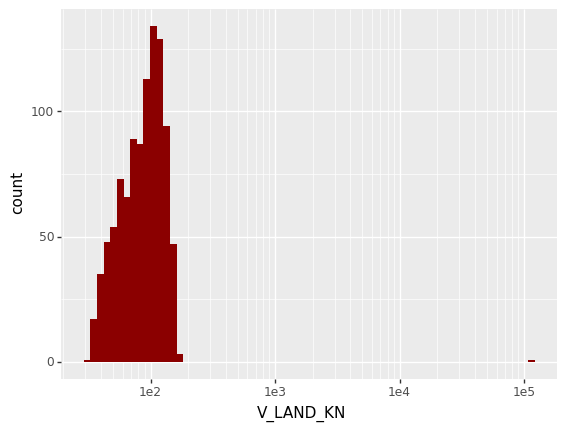

<ggplot: (8754638804758)>


/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


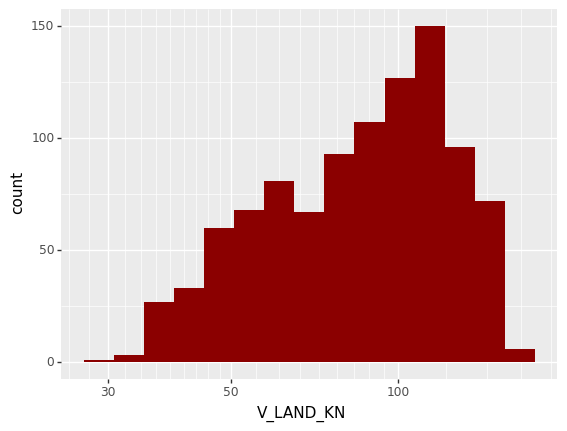

<ggplot: (-9223363282204241194)>


In [292]:
### V_LAND_KN
print(ggplot(df, aes(x='V_LAND_KN'))
 + geom_histogram(fill='darkred')
 + scale_x_log10())

df['V_LAND_KN'] = SimpleImputer(missing_values=110691.0, 
                                                        strategy='median').fit_transform(np.array(
    df['V_LAND_KN']).reshape(-1, 1))                   

print(ggplot(df, aes(x='V_LAND_KN'))
 + geom_histogram(fill='darkred')
 + scale_x_log10())   




In [293]:
plotBiMulti('V_LAND_KN', 
            scale_x=0, scale_y=1)
print(outlier_check(df['V_LAND_KN']))

{'lower': array([], dtype=int64), 'upper': array([], dtype=int64), 'q_both': [-16.124999999999986, 194.075], 'min-max': [30.0, 171.8]}


## MAX_USA_SSHS

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


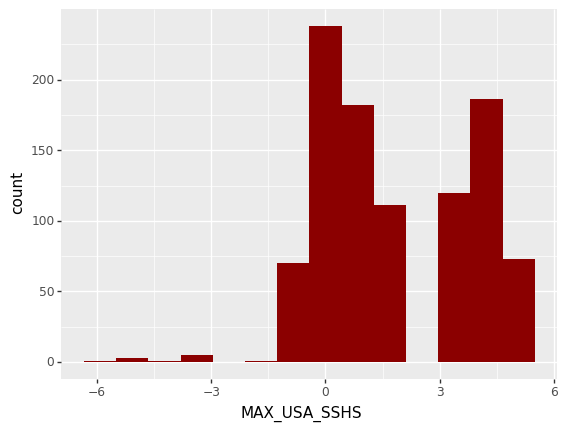

<ggplot: (-9223363282215971012)>


In [294]:
### MAX_USA_SSHS
print(ggplot(df, aes(x='MAX_USA_SSHS'))
 + geom_histogram(fill='darkred'))

In [295]:
plotBiMulti('MAX_USA_SSHS', 
            scale_x=0, scale_y=1)
print(outlier_check(df['MAX_USA_SSHS']))

{'lower': array([], dtype=int64), 'upper': array([], dtype=int64), 'q_both': [-6.0, 10.0], 'min-max': [-6, 5]}


## POP_DEN_SQ_KM

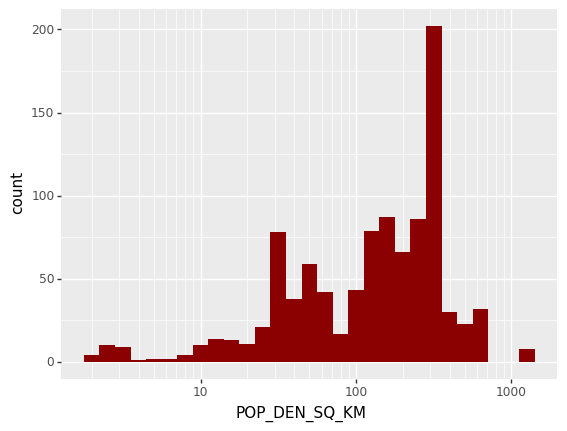

<ggplot: (8754639169877)>


In [296]:
### POP_DEN_SQ_KM


print(ggplot(df, aes(x='POP_DEN_SQ_KM'))
 + geom_histogram(fill='darkred', binwidth=0.1)
 + scale_x_log10())

df['POP_DEN_SQ_KM'] = np.log10(df['POP_DEN_SQ_KM'] + 1)

df["pop_break"] = np.where(df['POP_DEN_SQ_KM'].between(1, 2), 1, 0)
df["pop_break_two"] = np.where(df['POP_DEN_SQ_KM'].between(2, 3), 1, 0)

In [297]:
plotBiMulti('POP_DEN_SQ_KM', 
            scale_x=0, scale_y=1)
print(outlier_check(df['POP_DEN_SQ_KM']))

{'lower': array([ 61,  92, 172, 211, 309, 328, 377, 379, 388, 393, 417]), 'upper': array([], dtype=int64), 'q_both': [0.548792780081591, 3.6478786143215736], 'min-max': [0.44404479591807633, 3.104145550554008]}


## RURAL_POP(%)

In [0]:
### RURAL_POP(%)



In [299]:
plotBiMulti('RURAL_POP(%)', 
            scale_x=1, scale_y=1)
print(outlier_check(df['RURAL_POP(%)']))

{'lower': array([], dtype=int64), 'upper': array([], dtype=int64), 'q_both': [-36.925000000000004, 126.47500000000001], 'min-max': [0.0, 92.4]}


## DISTANCE_TRACK

In [0]:
### DISTANCE_TRACK


#df['DISTANCE_TRACK'] = np.log10(df['DISTANCE_TRACK'] + 1)

df = df.drop(columns=['DISTANCE_TRACK'])

In [0]:
#plotBiMulti('DISTANCE_TRACK', 
            #scale_x=1, scale_y=1)
#print(outlier_check(df['DISTANCE_TRACK']))

## DISTANCE_TRACK_VINCENTY

In [0]:
## DISTANCE_TRACK_VINCENTY




df['DISTANCE_TRACK_VINCENTY'] = np.log(df['DISTANCE_TRACK_VINCENTY'] + 1)

df = df.drop(columns=['DISTANCE_TRACK_VINCENTY'])

In [0]:
#plotBiMulti('DISTANCE_TRACK_VINCENTY', 
            #scale_x=0, scale_y=1)
#print(outlier_check(df['DISTANCE_TRACK_VINCENTY']))

## HDI

In [0]:
## HDI



In [305]:
plotBiMulti('HDI', 
            scale_x=0, scale_y=1)
print(outlier_check(df['HDI']))

{'lower': array([101, 150, 197, 326, 392, 465, 986, 989]), 'upper': array([], dtype=int64), 'q_both': [0.3439999999999999, 1.0], 'min-max': [0.217, 0.937]}


In [0]:
### Inpute features in bulk

df["MAX_STORMSPEED"]= df["MAX_STORMSPEED"].replace(0, np.nan) 
df["MIN_PRES"]= df["MIN_PRES"].replace(0, np.nan) 


df["RURAL_POP(%)"]= df["RURAL_POP(%)"].replace(0, np.nan) 
df["RURAL_POP(%)"]= df["RURAL_POP(%)"].replace(0.8, np.nan) 






median_cols = ['MAX_STORMSPEED', 
'Arable land (hectares per person)', 
'Food production index (2004-2006 = 100)', 
'GDP per capita (constant 2010 US$)', 
'Life expectancy at birth, total (years)',
'Adjusted savings: education expenditure (% of GNI)',
'Cereal yield (kg per hectare)',
'MIN_PRES',
'RURAL_POP(%)',
'Arable land (hectares per person)', 
'POP_MAX_34_ADJ', 
'POP_MAX_50_ADJ', 
'POP_MAX_64_ADJ']

median_imputer = SimpleImputer(missing_values=np.nan, 
                               strategy='median').fit(df[median_cols])

df[median_cols] = median_imputer.transform(df[median_cols])


df['Expectancy_break'] = np.where(
    df['Life expectancy at birth, total (years)'] > 67, 1, 0)


df["cereal_break"] = np.where(df['Cereal yield (kg per hectare)'].between(2500, 5000), 1, 0)
df["cereal_break_two"] = np.where(df['Cereal yield (kg per hectare)'] > 3650.0, 1, 0)


df["rural_break"] = np.where(df['RURAL_POP(%)'] < 37.5, 1, 0)
df["rural_break_two"] = np.where(df['RURAL_POP(%)'].between(37.5, 62.5), 1, 0)
df["rural_break_three"] = np.where(df['RURAL_POP(%)'] > 62.5, 1, 0)


df["rural_break_four"] = np.where(df['RURAL_POP(%)'] > 37.5, 1, 0)


df['dis2land_bin'] = np.where(df['MIN_DIST2LAND'] == 0, 1, 0)


In [0]:
# Dump Median imputer
pickle.dump(median_imputer, open("median.imp", 'wb')) 

In [0]:
'''log_cols = ['TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 
            'POP_DEN_SQ_KM', 'Arable land (hectares per person)']

for each in log_cols:
  df[each] = np.log(df[each] + 1)'''


df["pop_break"] = np.where(df['POP_DEN_SQ_KM'].between(1, 2), 1, 0)
df["pop_break_two"] = np.where(df['POP_DEN_SQ_KM'].between(2, 3), 1, 0)


# Categorical Variables

In [0]:
#############################################################################
#############################################################################
################ Categorical Variables ######################################
#############################################################################
#############################################################################

## GENERAL_CATEGORY

In [0]:


plotBiMulti_cat('GENERAL_CATEGORY')

## NATURE

In [0]:
#### NATURE


plotBiMulti_cat('NATURE')

## MAX_USA_SSHS_INLAND

In [0]:
### MAX_USA_SSHS_INLAND
df['MAX_USA_SSHS_INLAND'] = df['MAX_USA_SSHS_INLAND'].astype('object')

## Get Frequency Mapping
MAX_SSHS_dict = {x: df['MAX_USA_SSHS_INLAND'].value_counts()[x] 
                 for x in df['MAX_USA_SSHS_INLAND'].value_counts().index}

df['SSH_Freq'] = df['MAX_USA_SSHS_INLAND'].map(MAX_SSHS_dict)



In [313]:
MAX_SSHS_dict

{-7: 218,
 -6: 1,
 -5: 2,
 -4: 8,
 -3: 7,
 -2: 2,
 -1: 97,
 0: 272,
 1: 161,
 2: 91,
 3: 80,
 4: 43,
 5: 9}

In [0]:



plotBiMulti_cat('MAX_USA_SSHS_INLAND')

## BASIN

In [0]:
### BASIN

plotBiMulti_cat('BASIN')

## SUB BASIN

In [0]:
### SUB BASIN

plotBiMulti_cat('SUB BASIN')

## Income_level_Final

In [0]:
# Income_level_Final



plotBiMulti_cat('Income_level_Final')

In [0]:
### Final Trans


df['NEW_GEN_CAT'] = np.where(df['GENERAL_CATEGORY'] == 'Cat 1', 1, 0)
df['NEW_GEN_CAT'] = np.where(df['GENERAL_CATEGORY'] == 'TS', 2, 0)
df['NEW_GEN_CAT'] = df['NEW_GEN_CAT'].astype('object')


df['NEW_NATURE'] = np.where(df['NATURE'] == 'TS', 1, 0)
df['NEW_NATURE'] = np.where(df['NATURE'] == 'ET', 1, 0)


df['NEW_BASIN'] = np.where(df['BASIN'] == 'SP', 1, 0)
df['NEW_BASIN'] = np.where(df['BASIN'] == 'WP', 2, 0)
df['NEW_BASIN'] = df['NEW_BASIN'].astype('object')


df['NEW_SUB BASIN'] = np.where(df['SUB BASIN'] == 'EP', 1, 0)
df['NEW_SUB BASIN'] = np.where(df['SUB BASIN'] == 'NAm', 2, 0)
df['NEW_SUB BASIN'] = np.where(df['SUB BASIN'] == 'CS', 3, 0)
df['NEW_SUB BASIN'] = df['NEW_SUB BASIN'].astype('object')


df['NEW_Income_level_Final'] = np.where(df['Income_level_Final'] == 'Low_Middle', 1, 0)
df['NEW_Income_level_Final'] = np.where(df['Income_level_Final'] == 'High_Middle', 2, 0)
df['NEW_Income_level_Final'] = df['NEW_Income_level_Final'].astype('object')


df["SUBGEN"] = df['NEW_SUB BASIN'] + df['NEW_GEN_CAT']
df["SUBINCOME"] = df['NEW_SUB BASIN'] + df['NEW_Income_level_Final']

In [0]:
# Make Categorical
df['MONTH_START'] = df['MONTH_START'].astype("object")

# Target Variable

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 608'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


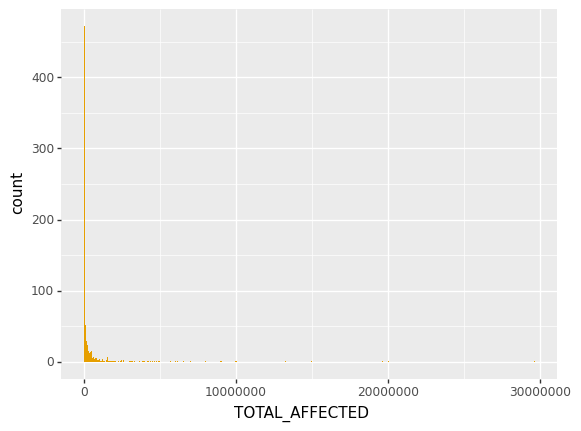

<ggplot: (8754650534341)>


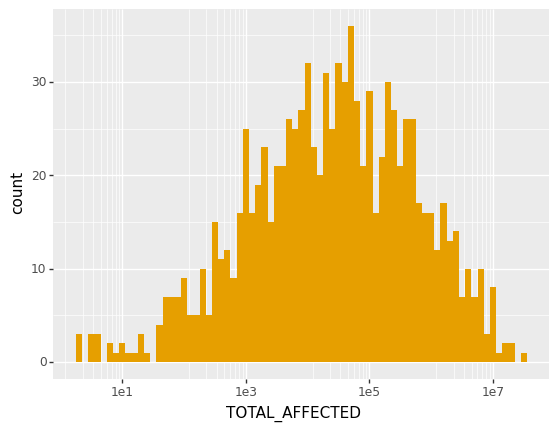

<ggplot: (-9223363282215960923)>


In [320]:
#############################################################################
#############################################################################
################ Target Variable ############################################
#############################################################################
#############################################################################
print(ggplot(df, aes(x='TOTAL_AFFECTED'))
 + geom_histogram(fill="#E69F00"))

print(ggplot(df, aes(x='TOTAL_AFFECTED'))
 + geom_histogram(fill="#E69F00", binwidth=0.1)
 + scale_x_log10())

df['TOTAL_AFFECTED'] = np.log10(df['TOTAL_AFFECTED'])

In [0]:

df = df.drop(columns=['Income_level_Final', 'BASIN', 'SUB BASIN', 'NATURE', 'GENERAL_CATEGORY'])

#df['MAX_USA_SSHS_INLAND'] = df['MAX_USA_SSHS_INLAND'].astype('int')

In [322]:
object_columns = [col for col in df.columns.values if df[col].dtype == 'object']

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(df[object_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [127]:
object_columns

['MONTH_START',
 'MAX_USA_SSHS_INLAND',
 'NEW_GEN_CAT',
 'NEW_BASIN',
 'NEW_SUB BASIN',
 'NEW_Income_level_Final',
 'SUBGEN',
 'SUBINCOME']

In [0]:
pickle.dump(enc, open("enc.encoder", 'wb')) 

In [0]:

###dummies = pd.get_dummies(df[object_columns]) old way

dummies = enc.transform(df[object_columns])
dummies = pd.DataFrame(data=dummies, 
                       columns=pd.get_dummies(df[object_columns]).columns.values)

df_dummies = pd.concat([df, dummies], axis=1)
df_dummies = df_dummies.drop(columns=object_columns)

In [130]:
pd.get_dummies(df[object_columns]).columns.values

array(['MONTH_START_1', 'MONTH_START_2', 'MONTH_START_3', 'MONTH_START_4',
       'MONTH_START_5', 'MONTH_START_6', 'MONTH_START_7', 'MONTH_START_8',
       'MONTH_START_9', 'MONTH_START_10', 'MONTH_START_11',
       'MONTH_START_12', 'MAX_USA_SSHS_INLAND_-7',
       'MAX_USA_SSHS_INLAND_-6', 'MAX_USA_SSHS_INLAND_-5',
       'MAX_USA_SSHS_INLAND_-4', 'MAX_USA_SSHS_INLAND_-3',
       'MAX_USA_SSHS_INLAND_-2', 'MAX_USA_SSHS_INLAND_-1',
       'MAX_USA_SSHS_INLAND_0', 'MAX_USA_SSHS_INLAND_1',
       'MAX_USA_SSHS_INLAND_2', 'MAX_USA_SSHS_INLAND_3',
       'MAX_USA_SSHS_INLAND_4', 'MAX_USA_SSHS_INLAND_5', 'NEW_GEN_CAT_0',
       'NEW_GEN_CAT_2', 'NEW_BASIN_0', 'NEW_BASIN_2', 'NEW_SUB BASIN_0',
       'NEW_SUB BASIN_3', 'NEW_Income_level_Final_0',
       'NEW_Income_level_Final_2', 'SUBGEN_0', 'SUBGEN_2', 'SUBGEN_3',
       'SUBGEN_5', 'SUBINCOME_0', 'SUBINCOME_2', 'SUBINCOME_3',
       'SUBINCOME_5'], dtype=object)

In [0]:
## Split data
features = [x for x in df_dummies.columns.values if x != 'TOTAL_AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(
    df_dummies[features], df_dummies['TOTAL_AFFECTED'], 
    test_size=0.2, random_state=42)

In [128]:
features

['YEAR',
 'TOTAL_HOURS_IN_LAND',
 'MAX_WIND',
 'MIN_PRES',
 'MIN_DIST2LAND',
 'MAX_STORMSPEED',
 'MAX_USA_SSHS',
 'V_LAND_KN',
 'POP_DEN_SQ_KM',
 'RURAL_POP(%)',
 'HDI',
 'Arable land (hectares per person)',
 'Cereal yield (kg per hectare)',
 'Food production index (2004-2006 = 100)',
 'GDP per capita (constant 2010 US$)',
 'Net flows from UN agencies US$',
 'Life expectancy at birth, total (years)',
 'Adjusted savings: education expenditure (% of GNI)',
 'POP_MAX_34_ADJ',
 'POP_MAX_50_ADJ',
 'POP_MAX_64_ADJ',
 'MAX_SSH_7',
 'MAX_SSH_SS',
 'pop_break',
 'pop_break_two',
 'Expectancy_break',
 'cereal_break',
 'cereal_break_two',
 'rural_break',
 'rural_break_two',
 'rural_break_three',
 'rural_break_four',
 'dis2land_bin',
 'SSH_Freq',
 'NEW_NATURE',
 'MONTH_START_1',
 'MONTH_START_2',
 'MONTH_START_3',
 'MONTH_START_4',
 'MONTH_START_5',
 'MONTH_START_6',
 'MONTH_START_7',
 'MONTH_START_8',
 'MONTH_START_9',
 'MONTH_START_10',
 'MONTH_START_11',
 'MONTH_START_12',
 'MAX_USA_SSHS_INLAND

In [129]:
object_columns

['MONTH_START',
 'MAX_USA_SSHS_INLAND',
 'NEW_GEN_CAT',
 'NEW_BASIN',
 'NEW_SUB BASIN',
 'NEW_Income_level_Final',
 'SUBGEN',
 'SUBINCOME']

In [0]:
# Standard scaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

In [0]:
'''from sklearn.preprocessing import RobustScaler
# Standard scaler
scaler = RobustScaler()
scaled_X = scaler.fit_transform(X_train)'''

# Clustering




## KMEANS

In [326]:
for n_cluster in range(2, 11):
  km = KMeans(n_clusters=n_cluster, random_state=42).fit(scaled_X)
  print('{} -- {}'.format(n_cluster, silhouette_score(scaled_X, km.labels_)))

2 -- 0.0999875076262445
3 -- 0.11360082869812246
4 -- 0.11114451214003646
5 -- 0.11503101905313329
6 -- 0.0995743578675544
7 -- 0.1054664489517942
8 -- 0.11674950227472639
9 -- 0.11760572556319361
10 -- 0.12705636238961338


In [327]:
km = KMeans(n_clusters=2, random_state=42).fit(scaled_X)
km.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
pickle.dump(km, open("kmeans.cluster", 'wb')) 
pickle.dump(scaler, open("scale.scaler", 'wb')) 

## PCA

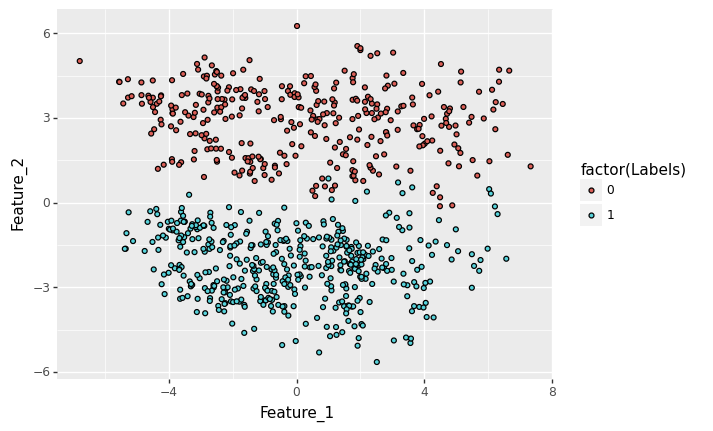

<ggplot: (8754637745798)>


In [328]:
pca = PCA(n_components=2)
pca.fit(scaled_X)

scaled_X_pca = pca.transform(scaled_X)

pca_df = pd.DataFrame({"Labels": km.labels_, 
                       "Feature_1": scaled_X_pca[:, 0], 
                       "Feature_2": scaled_X_pca[:, 1]})

print(ggplot(pca_df, aes(x='Feature_1', y='Feature_2', fill="factor(Labels)"))
 + geom_point())

In [0]:
## Join Clustering Labels
scaled_X_Kmeans = np.column_stack((scaled_X, km.labels_.reshape(-1, 1)))

# Modeling

## Model Architecture

In [0]:
# Model Architecture
def build_model():
  clf = Sequential()

  clf.add(Dense(32, kernel_initializer='random_normal', input_shape=(scaled_X_Kmeans.shape[1], )))
  clf.add(BatchNormalization())
  clf.add(LeakyReLU(0.2))

  clf.add(Dense(64, kernel_initializer='random_normal'))
  clf.add(BatchNormalization())
  clf.add(LeakyReLU(0.2))
  

  clf.add(Dense(1, kernel_initializer='random_normal'))

  optim = optimizers.RMSprop(learning_rate=0.0001)
  clf.compile(loss='mse', optimizer=optim, metrics=['mae'])

  return(clf)

In [0]:
def build_model():
  clf = Sequential()

  clf.add(Dense(16, kernel_initializer='random_normal', input_shape=(scaled_X_Kmeans.shape[1], )))
  clf.add(BatchNormalization())
  clf.add(ReLU())

  clf.add(Dense(32, kernel_initializer='random_normal'))
  clf.add(ReLU())
  clf.add(Dropout(0.45))
  
  clf.add(Dense(64, kernel_initializer='random_normal'))
  clf.add(BatchNormalization())
  clf.add(ReLU())

  clf.add(Dense(128, kernel_initializer='random_normal'))
  clf.add(BatchNormalization())
  clf.add(Dropout(0.3))

  clf.add(Dense(256, kernel_initializer='random_normal'))
  clf.add(BatchNormalization())
  clf.add(ReLU())

  clf.add(Dense(512, kernel_initializer='random_normal'))
  clf.add(BatchNormalization()) ## 512 ----
  clf.add(ReLU())

  clf.add(Dense(1, kernel_initializer='random_normal'))

  optim = optimizers.RMSprop(learning_rate=0.00001)
  clf.compile(loss='mse', optimizer=optim, metrics=['mae'])

  return(clf)

## Loss & Callback

In [0]:
## Loss & Optimizer setup
keras_model = build_model()
callback = [EarlyStopping(monitor='val_loss', patience=400, 
                                              verbose=1, mode='min'), 
            ModelCheckpoint('model.sve', monitor='val_loss', verbose=True, 
                            save_best_only=True, mode='min')]

## Train model

In [335]:
history = keras_model.fit(scaled_X_Kmeans, np.array(y_train), epochs=1000, 
                          validation_split=0.2, batch_size=32, callbacks=callback)

Train on 633 samples, validate on 159 samples
Epoch 1/1000
633/633 [==============================] - 1s 1ms/step - loss: 26.7709 - mae: 4.9362 - val_loss: 19.2776 - val_mae: 4.2095

Epoch 00001: val_loss improved from inf to 19.27764, saving model to model.sve
Epoch 2/1000
633/633 [==============================] - 0s 207us/step - loss: 26.3589 - mae: 4.8902 - val_loss: 19.6302 - val_mae: 4.2512

Epoch 00002: val_loss did not improve from 19.27764
Epoch 3/1000
633/633 [==============================] - 0s 183us/step - loss: 25.8028 - mae: 4.8540 - val_loss: 19.9609 - val_mae: 4.2899

Epoch 00003: val_loss did not improve from 19.27764
Epoch 4/1000
633/633 [==============================] - 0s 193us/step - loss: 25.2497 - mae: 4.8004 - val_loss: 20.2869 - val_mae: 4.3278

Epoch 00004: val_loss did not improve from 19.27764
Epoch 5/1000
633/633 [==============================] - 0s 179us/step - loss: 24.8543 - mae: 4.7514 - val_loss: 20.5262 - val_mae: 4.3553

Epoch 00005: val_loss did 

## Visualize

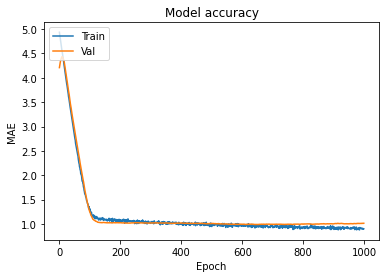

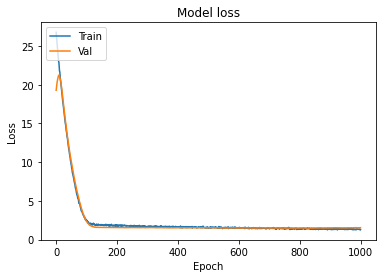

In [336]:
## Visualize model loss

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scaled_X_test = scaler.transform(X_test)
scaled_X_Kmeans_test = np.column_stack((scaled_X_test, km.predict(scaled_X_test).reshape(-1, 1)))

In [339]:
k_model = load_model("model.sve")
k_model.evaluate(scaled_X_Kmeans_test, np.array(y_test))

###1.34 best fit (so far)
###1.27 best fit (so far)

199/199 [==============================] - 0s 493us/step


[1.49976976073567, 0.9685293436050415]

In [340]:
np.sqrt(mean_squared_error(10**np.array(y_test), 
                           10**k_model.predict(scaled_X_Kmeans_test))), mean_absolute_error(10**np.array(y_test), 
                           10**k_model.predict(scaled_X_Kmeans_test))

(1433584.105292253, 443942.24230036914)

In [0]:
10**k_model.predict(scaled_X_Kmeans_test)

In [0]:
# serialize model to JSON
keras_json = k_model.to_json()

with open("keras.json", "w") as json_file:
    json_file.write(keras_json)

# serialize weights to HDF5
k_model.save_weights("keras.h5")

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
clf.fit(scaled_X_Kmeans, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [176]:
np.sqrt(mean_squared_error(y_test**2, 
                    clf.predict(scaled_X_Kmeans_test)**2)), mean_absolute_error(y_test**2, 
                    clf.predict(scaled_X_Kmeans_test)**2), mean_squared_error(y_test**2, 
                    clf.predict(scaled_X_Kmeans_test)**2), np.sqrt(mean_squared_error(y_train**2, clf.predict(scaled_X_Kmeans)**2))

(1342797.0610217627,
 479837.92434069887,
 1803103947088.6833,
 320449.08122964506)

In [0]:
pickle.dump(clf, open('GBM.model', 'wb'))

In [162]:
from sklearn.model_selection import GridSearchCV

'''parameters = {'n_estimators':[100, 300, 700, 900, 2000], 
              'min_samples_split':[2, 3, 4], 'max_depth':[3, 4, 5, 6]
              }

clf = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error')
clf.fit(scaled_X_Kmeans, y_train)'''

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=4,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500,
                                                 n_ite...,
                           

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
KR = KerasRegressor(build_model, epochs=466, batch_size=32, verbose=0)

In [0]:
KR.fit(scaled_X_Kmeans, y_train)

## Feature Importance

In [0]:
cols = X_train.columns.tolist()
cols.append('C_Label')

### Feature Importances - GradientBoosting
imp = permutation_importance(clf, scaled_X_Kmeans_test, 
                                                y_test, scoring='neg_mean_squared_error')


imp = PermutationImportance(clf,n_iter=2).fit(scaled_X_Kmeans_test, y_test)
eli5.show_weights(imp, feature_names = cols, top=scaled_X_Kmeans.shape[1])

In [0]:
### Feature Importances - ANN

imp = permutation_importance(KR, scaled_X_Kmeans_test, 
                                                y_test, scoring='neg_mean_squared_error')

imp = PermutationImportance(clf,n_iter=2).fit(scaled_X_Kmeans_test, y_test)
eli5.show_weights(imp, feature_names = cols, top=scaled_X_Kmeans.shape[1])

# XGBOOST

In [0]:
#data_dmatrix = xgb.DMatrix(data=scaled_X_Kmeans,label=y_train)

In [174]:
xg_reg = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)



xg_reg.fit(scaled_X_Kmeans, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [169]:
'''parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [4, 5, 6, 7],
              'min_child_weight': [3, 4, 6],
              'subsample': [0.7, 0.6, 0.8],
              'colsample_bytree': [0.7, 0.5, 0.8],
              'n_estimators': [500, 700, 1000, 2000]}

xg_reg = GridSearchCV(xg_reg, parameters, scoring='neg_mean_squared_error')
xg_reg.fit(scaled_X_Kmeans, y_train)'''

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.2, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=4,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_sta...
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 0.5, 0.8],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [3, 4, 6],
                         'n_estimators': [500, 700

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [172]:
np.sqrt(mean_squared_error(y_test**2, 
                           xg_reg.predict(scaled_X_Kmeans_test)**2)), mean_absolute_error(y_test**2, 
                           xg_reg.predict(scaled_X_Kmeans_test)**2)

(1333414.2126299362, 487400.9387098868)

In [0]:
pickle.dump(clf, open('XGB.model', 'wb'))

In [0]:
'''params = {"objective":"reg:squarederror",'colsample_bytree': 0.4,'learning_rate': 0.1,
                'max_depth':3, 'alpha': 10, 'n_estimators':2000}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, verbose_eval=1,
                    num_boost_round=250,early_stopping_rounds=20,metrics="rmse", as_pandas=True, seed=123)


xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=88)
xgb_test = xgb.DMatrix(scaled_X_Kmeans_test)


np.sqrt(mean_squared_error(10**y_test, 
                           10**xg_reg.predict(xgb_test)))'''

In [0]:
xg_reg

In [0]:
from sklearn.linear_model import LinearRegression
L_R = LinearRegression()
#L_R.fit(scaled_X_Kmeans, y_train)

In [0]:
from sklearn.svm import SVR
SVM = SVR()
#SVM.fit(scaled_X_Kmeans, y_train)

In [0]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
#RF.fit(scaled_X_Kmeans, y_train)

In [0]:
from xgboost import XGBRFRegressor
XGB = XGBRFRegressor(n_estimators=2000, max_depth=4, learning_rate=0.1, 
                     objective ='reg:squarederror', colsample_bytree = 0.2)
#XGB.fit(scaled_X_Kmeans, y_train)

## Visualize Prediction

In [0]:
XGB_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": XGB.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (XGB.predict(scaled_X_Kmeans_test)**2)})

print(ggplot(XGB_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
XGB_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": xg_reg.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (xg_reg.predict(scaled_X_Kmeans_test)**2)})


print(ggplot(XGB_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
GB_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": clf.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (clf.predict(scaled_X_Kmeans_test)**2)})

print(ggplot(GB_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
LR_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": L_R.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (L_R.predict(scaled_X_Kmeans_test)**2)})


print(ggplot(LR_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
SVM_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": SVM.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (SVM.predict(scaled_X_Kmeans_test)**2)})


print(ggplot(SVM_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
RF_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": RF.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (RF.predict(scaled_X_Kmeans_test)**2)})


print(ggplot(RF_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [0]:
clfs = [('Random Forest', RF), ('Support Vector',SVM), ('Linear',L_R), 
        ('XGB',XGB), ('GBM',clf)]

In [0]:
from sklearn.ensemble import StackingRegressor
SR = StackingRegressor(clfs)

SR.fit(scaled_X_Kmeans, y_train)

In [0]:
np.sqrt(mean_squared_error(y_test**2, 
                           SR.predict(scaled_X_Kmeans_test)**2))

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
split = kf.split(scaled_X_Kmeans)

In [0]:

for i, (train_index, test_index) in enumerate(split):

  train_vec = np.zeros((scaled_X_Kmeans.shape[0],))
  test_vec = np.zeros((ntrain,))
  hold_vec = np.empty((kf.get_n_splits(), ntest))

  x_t = scaled_X_Kmeans[train_index]
  y_t = y_train[train_index]

  clf.fit(scaled_X_Kmeans[train_index], y_train[train_index])

In [0]:
SR_pred = pd.DataFrame({"Pred": y_test**2, 
              "Actual": SR.predict(scaled_X_Kmeans_test)**2, 
              "Residual":(y_test**2) - (SR.predict(scaled_X_Kmeans_test)**2)})


print(ggplot(SR_pred, aes(x='Actual', y='Pred'))
 + geom_point()
 + scale_x_log10()
 + scale_y_log10())

In [304]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [149]:
np.sort(df['MAX_USA_SSHS'].unique())

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])